In [1]:
#Import dependancies
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
from pprint import pprint
from scipy.stats import linregress
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.pyplot import figure
import datetime as dt
import numpy.polynomial.polynomial as poly

In [2]:
#Covid data reading and column checking 
Covid_records = "Resources/IL_covid_data.csv"
Covid_recordsDF = pd.read_csv(Covid_records, encoding="utf-8")
Covid_recordsDF.columns

Index(['Date', 'Cases - Total', 'Deaths - Total', 'Hospitalizations - Total',
       'Cases - Age 0-17', 'Cases - Age 18-29', 'Cases - Age 30-39',
       'Cases - Age 40-49', 'Cases - Age 50-59', 'Cases - Age 60-69',
       'Cases - Age 70-79', 'Cases -  Age 80+', 'Cases - Age Unknown',
       'Cases - Female', 'Cases - Male', 'Cases - Unknown Gender',
       'Cases - Latinx', 'Cases - Asian Non-Latinx',
       'Cases - Black Non-Latinx', 'Cases - White Non-Latinx',
       'Cases - Other Race Non-Latinx', 'Cases - Unknown Race/Ethnicity',
       'Deaths - Age 0-17', 'Deaths - Age 18-29', 'Deaths - Age 30-39',
       'Deaths - Age 40-49', 'Deaths - Age 50-59', 'Deaths - Age 60-69',
       'Deaths - Age 70-79', 'Deaths - Age 80+', 'Deaths - Age Unknown',
       'Deaths - Female', 'Deaths - Male', 'Deaths - Unknown Gender',
       'Deaths - Latinx', 'Deaths - Asian Non-Latinx',
       'Deaths - Black Non-Latinx', 'Deaths - White Non-Latinx',
       'Deaths - Other Race Non-Latinx', 'Death

In [3]:
Covid_recordsDF.dtypes

Date                                          object
Cases - Total                                 object
Deaths - Total                                 int64
Hospitalizations - Total                      object
Cases - Age 0-17                               int64
Cases - Age 18-29                              int64
Cases - Age 30-39                              int64
Cases - Age 40-49                              int64
Cases - Age 50-59                              int64
Cases - Age 60-69                              int64
Cases - Age 70-79                              int64
Cases -  Age 80+                               int64
Cases - Age Unknown                            int64
Cases - Female                                object
Cases - Male                                  object
Cases - Unknown Gender                         int64
Cases - Latinx                                object
Cases - Asian Non-Latinx                       int64
Cases - Black Non-Latinx                      

In [4]:
# Filtered DF from specific columns
Covid_cols = ["Date", "Cases - Total"]
Covid_transformed= Covid_recordsDF[Covid_cols].copy()

#clean
print(Covid_transformed.shape)
Covid_transformed.drop_duplicates("Date", inplace=True) # method 1
Covid_transformed = Covid_transformed.dropna() # method 2
Covid_transformed.head()

(333, 2)


,Date,Cases - Total
0,3/1/2020,0
1,3/2/2020,0
2,3/3/2020,0
3,3/4/2020,0
4,3/5/2020,1


In [5]:
#Datetime for Covid
Covid_transformed['Date'] = pd.to_datetime(Covid_transformed['Date'], format="%m/%d/%Y")
Covid_transformed.dtypes

Date             datetime64[ns]
Cases - Total            object
dtype: object

In [6]:
Covid_transformed['Cases - Total'] = Covid_transformed['Cases - Total'].str.replace(",", "")

In [7]:
Covid_transformed['Cases - Total'] = Covid_transformed['Cases - Total'].astype('int')

In [8]:
#Crime data reading and column checking 
Crime_datadf = "Resources/Chi_crime_data.csv"
Crime_datadf = pd.read_csv(Crime_datadf, encoding="utf-8")
Crime_datadf.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [9]:
Crime_datadf.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,02/25/2020 10:20:00 AM,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,02/25/2020 05:30:00 AM,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,02/25/2020 01:04:00 PM,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,02/25/2020 06:05:00 PM,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,02/25/2020 01:42:00 PM,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"


In [10]:
#fixing dates and merging DFs
Crime_datadf['DATE  OF OCCURRENCE'] = pd.to_datetime(Crime_datadf['DATE  OF OCCURRENCE'], format="%m/%d/%Y %I:%M:%S %p")
Crime_datadf.dtypes

CASE#                             object
DATE  OF OCCURRENCE       datetime64[ns]
BLOCK                             object
 IUCR                             object
 PRIMARY DESCRIPTION              object
 SECONDARY DESCRIPTION            object
 LOCATION DESCRIPTION             object
ARREST                            object
DOMESTIC                          object
BEAT                               int64
WARD                             float64
FBI CD                            object
X COORDINATE                     float64
Y COORDINATE                     float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
dtype: object

In [11]:
Crime_datadf['DATE  OF OCCURRENCE - DAY'] = Crime_datadf['DATE  OF OCCURRENCE'].dt.date

In [12]:
# Crime_datadf['DATE  OF OCCURRENCE'] = Crime_datadf['DATE  OF OCCURRENCE'].apply(lambda x: x.replace(hour=0, minute=0, second=0))

In [13]:
Crime_datadf.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'DATE  OF OCCURRENCE - DAY'],
      dtype='object')

In [14]:
Crime_datadf.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,DATE OF OCCURRENCE - DAY
0,JD164115,2020-02-25 10:20:00,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)",2020-02-25
1,JD163938,2020-02-25 05:30:00,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)",2020-02-25
2,JC164345,2020-02-25 13:04:00,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)",2020-02-25
3,JD164701,2020-02-25 18:05:00,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)",2020-02-25
4,JD164416,2020-02-25 13:42:00,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)",2020-02-25


In [15]:
#Clean that Data 
Crime_cols = ["CASE#", " IUCR", "DATE  OF OCCURRENCE - DAY", " PRIMARY DESCRIPTION", " SECONDARY DESCRIPTION", " LOCATION DESCRIPTION", "ARREST", "DOMESTIC"]
Crime_transformed = Crime_datadf[Crime_cols].copy()
print(Crime_transformed.shape)
Crime_transformed.drop_duplicates("CASE#", inplace=True)
print(Crime_transformed.shape)
Crime_transformed.dropna(inplace=True)
print(Crime_transformed.shape)
Crime_transformed.rename(columns={"DATE  OF OCCURRENCE - DAY": "Date"}, inplace=True)
Crime_transformed['Date'] = pd.to_datetime(Crime_transformed['Date'], format='%Y-%m-%d')
Crime_transformed.head()

(205923, 8)
(205894, 8)
(204805, 8)


,CASE#,IUCR,Date,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC
0,JD164115,0460,2020-02-25,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N
1,JD163938,0820,2020-02-25,THEFT,$500 AND UNDER,STREET,N,N
2,JC164345,1330,2020-02-25,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N
3,JD164701,0486,2020-02-25,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y
4,JD164416,2027,2020-02-25,NARCOTICS,POSS: CRACK,STREET,Y,N


In [16]:
#Merge to a single df
combined_data_df = pd.merge(Covid_transformed, Crime_transformed, on='Date')

In [17]:
print(combined_data_df.shape)
combined_data_df.head()

(180413, 9)


,Date,Cases - Total,CASE#,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC
0,2020-03-01,0,JD170468,0110,HOMICIDE,FIRST DEGREE MURDER,VESTIBULE,Y,N
1,2020-03-01,0,JD368864,0890,THEFT,FROM BUILDING,OTHER (SPECIFY),N,N
2,2020-03-01,0,JD170475,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,Y,Y
3,2020-03-01,0,JD191229,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,N,N
4,2020-03-01,0,JD170171,2027,NARCOTICS,POSSESS - CRACK,APARTMENT,Y,N


Text(0, 0.5, '# of Cases')

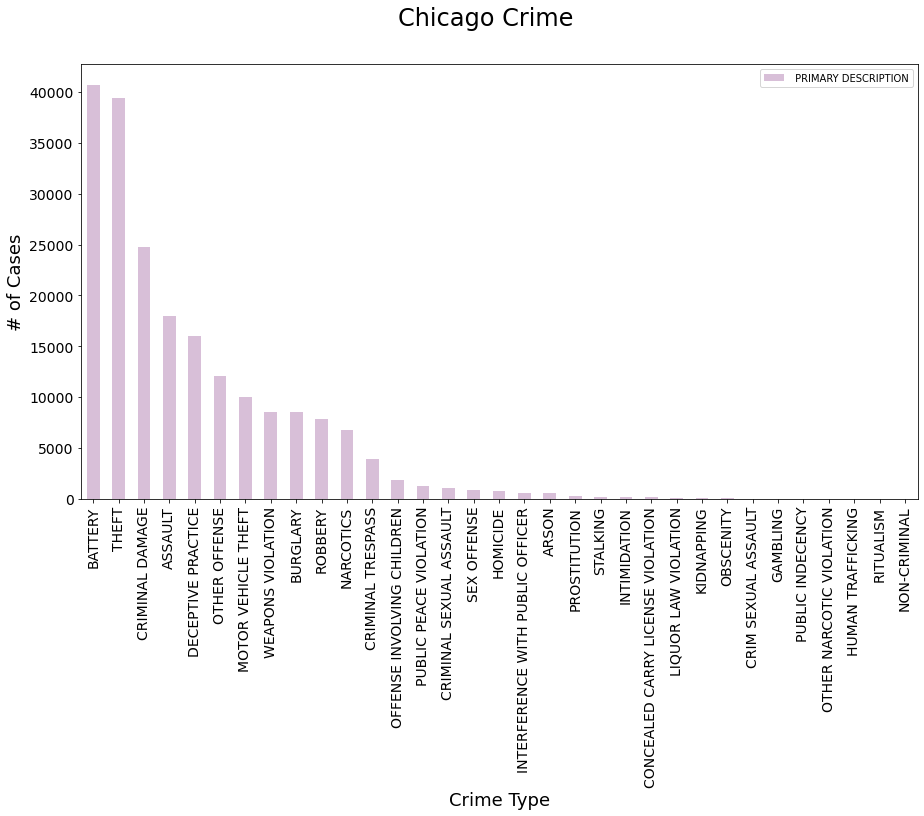

In [18]:
#First Quesyion Bar plot - Most committed crime type
plt.rcParams["figure.figsize"] = (15, 8)
crime_type_df = pd.DataFrame(Crime_transformed[" PRIMARY DESCRIPTION"].value_counts())
first_question_plot = crime_type_df.plot(kind="bar", color='thistle', fontsize=14)
plt.suptitle('Chicago Crime', fontsize=24)
first_question_plot.set_xlabel('Crime Type', fontsize=18)
first_question_plot.set_ylabel('# of Cases', fontsize=18)

In [19]:
#Counts of crime per day
total_crime_df = Crime_transformed.value_counts(["Date"]).reset_index(name='Counts')

In [20]:
#Print out counts to csv
total_crime_df.to_csv('file_name.csv', index=False)

In [21]:
total_crime_df.sort_values('Date', inplace=True)

In [22]:
#Merge daily crime counts with covid counts
total_crime_with_covid_df = pd.merge(total_crime_df, Covid_transformed, on = "Date")

In [23]:
#Sort by date
total_crime_with_covid_df.sort_values('Date', inplace=True)
total_crime_with_covid_df = total_crime_with_covid_df.reset_index(drop=True)

In [24]:
total_crime_with_covid_df

,Date,Counts,Cases - Total
0,2020-03-01,706,0
1,2020-03-02,592,0
2,2020-03-03,630,0
3,2020-03-04,619,0
4,2020-03-05,583,1
...,...,...,...
321,2021-01-16,466,582
322,2021-01-17,460,365
323,2021-01-18,441,619
324,2021-01-19,471,1004


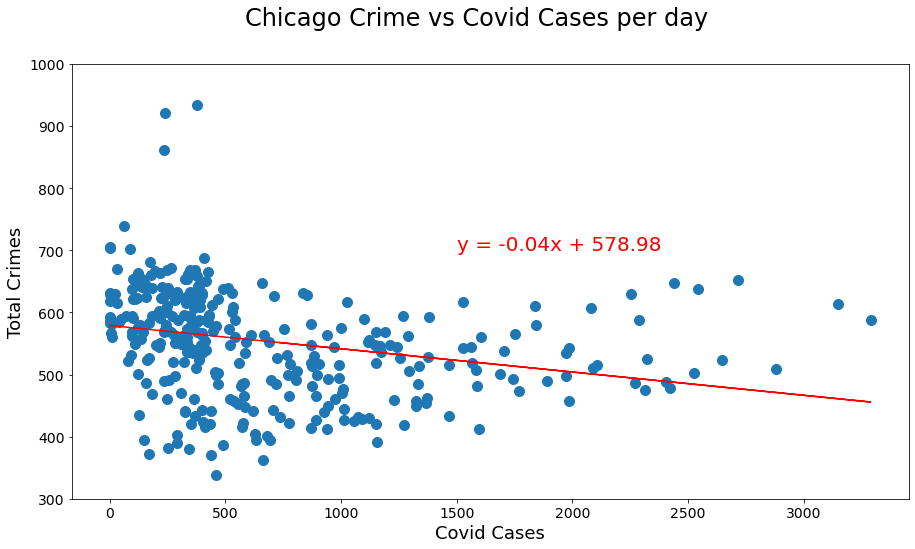

In [25]:
#Scatter plot correlation of covid and crime cases
x_values = total_crime_with_covid_df['Cases - Total']
y_values = total_crime_with_covid_df['Counts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s= 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1500,700),fontsize=20,color="red")
plt.xlabel('Covid Cases', fontsize=18)
plt.ylabel('Total Crimes', fontsize=18)
plt.ylim([300, 1000])
plt.suptitle('Chicago Crime vs Covid Cases per day', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [26]:
#Describe the data set so we can see if there are any outliers.
total_crime_with_covid_df.describe()

,Counts,Cases - Total
count,326.000000,326.000000
mean,553.414110,682.693252
std,113.446281,635.794556
min,339.000000,0.000000
25%,490.250000,252.500000
50%,553.500000,416.000000
75%,612.000000,945.000000
max,1894.000000,3289.000000


In [27]:
total_crime_type_df = Crime_transformed.value_counts([" PRIMARY DESCRIPTION", "Date"]).reset_index(name='Counts')
total_crime_type_df

,PRIMARY DESCRIPTION,Date,Counts
0,BURGLARY,2020-05-31,581
1,CRIMINAL DAMAGE,2020-05-31,343
2,BURGLARY,2020-08-10,315
3,PUBLIC PEACE VIOLATION,2020-05-31,309
4,BURGLARY,2020-05-30,216
...,...,...,...
7323,INTERFERENCE WITH PUBLIC OFFICER,2020-06-28,1
7324,INTERFERENCE WITH PUBLIC OFFICER,2020-06-29,1
7325,INTERFERENCE WITH PUBLIC OFFICER,2020-07-03,1
7326,INTERFERENCE WITH PUBLIC OFFICER,2020-07-05,1


In [28]:
total_crime_type_df.sort_values(['Date', " PRIMARY DESCRIPTION"], inplace=True)
total_crime_type_df.to_csv('crime_type.csv', index=False)
total_crime_type_df

,PRIMARY DESCRIPTION,Date,Counts
1297,ASSAULT,2020-01-22,52
351,BATTERY,2020-01-22,110
2684,BURGLARY,2020-01-22,25
6269,CONCEALED CARRY LICENSE VIOLATION,2020-01-22,1
7029,CRIM SEXUAL ASSAULT,2020-01-22,1
...,...,...,...
5972,PUBLIC PEACE VIOLATION,2021-01-20,2
2548,ROBBERY,2021-01-20,26
5595,SEX OFFENSE,2021-01-20,2
768,THEFT,2021-01-20,79


In [29]:
total_crime_type_with_covid_df = pd.merge(total_crime_type_df, Covid_transformed, on = "Date")
total_crime_type_with_covid_df

,PRIMARY DESCRIPTION,Date,Counts,Cases - Total
0,ARSON,2020-03-01,1,0
1,ASSAULT,2020-03-01,46,0
2,BATTERY,2020-03-01,147,0
3,BURGLARY,2020-03-01,15,0
4,CONCEALED CARRY LICENSE VIOLATION,2020-03-01,2,0
...,...,...,...,...
6494,PUBLIC PEACE VIOLATION,2021-01-20,2,735
6495,ROBBERY,2021-01-20,26,735
6496,SEX OFFENSE,2021-01-20,2,735
6497,THEFT,2021-01-20,79,735


In [30]:
total_crime_type_with_covid_df.sort_values(['Date', " PRIMARY DESCRIPTION"], inplace=True)
total_crime_type_with_covid_df.to_csv('crime_type_with_covid.csv')

In [31]:
total_crime_with_covid_df.describe()

,Counts,Cases - Total
count,326.000000,326.000000
mean,553.414110,682.693252
std,113.446281,635.794556
min,339.000000,0.000000
25%,490.250000,252.500000
50%,553.500000,416.000000
75%,612.000000,945.000000
max,1894.000000,3289.000000


In [32]:
total_domestic_df = Crime_transformed[~(Crime_transformed['DOMESTIC'] == 'N')]

In [33]:
total_domestic_df = total_domestic_df.value_counts(["DOMESTIC", 'Date']).reset_index(name='Counts')

In [34]:
total_domestic_df.sort_values('Date', inplace=True)

In [35]:
total_domestic_df

,DOMESTIC,Date,Counts
333,Y,2020-01-22,84
303,Y,2020-01-23,89
233,Y,2020-01-24,100
131,Y,2020-01-25,114
197,Y,2020-01-26,105
...,...,...,...
86,Y,2021-01-16,120
114,Y,2021-01-17,116
124,Y,2021-01-18,115
252,Y,2021-01-19,97


In [36]:
total_domestic_with_covid_df = pd.merge(total_domestic_df, Covid_transformed, on = "Date")

In [37]:
total_domestic_with_covid_df.sort_values('Date', inplace=True)
total_domestic_with_covid_df = total_domestic_with_covid_df.reset_index(drop=True)

In [38]:
#total_domestic_with_covid_df.to_csv('domestic_with_covid.csv')

In [39]:
total_domestic_with_covid_df.describe()

,Counts,Cases - Total
count,326.000000,326.000000
mean,108.604294,682.693252
std,19.425436,635.794556
min,63.000000,0.000000
25%,95.000000,252.500000
50%,108.000000,416.000000
75%,120.000000,945.000000
max,175.000000,3289.000000


In [40]:
total_domestic_with_covid_df

,DOMESTIC,Date,Counts,Cases - Total
0,Y,2020-03-01,141,0
1,Y,2020-03-02,107,0
2,Y,2020-03-03,115,0
3,Y,2020-03-04,109,0
4,Y,2020-03-05,94,1
...,...,...,...,...
321,Y,2021-01-16,120,582
322,Y,2021-01-17,116,365
323,Y,2021-01-18,115,619
324,Y,2021-01-19,97,1004


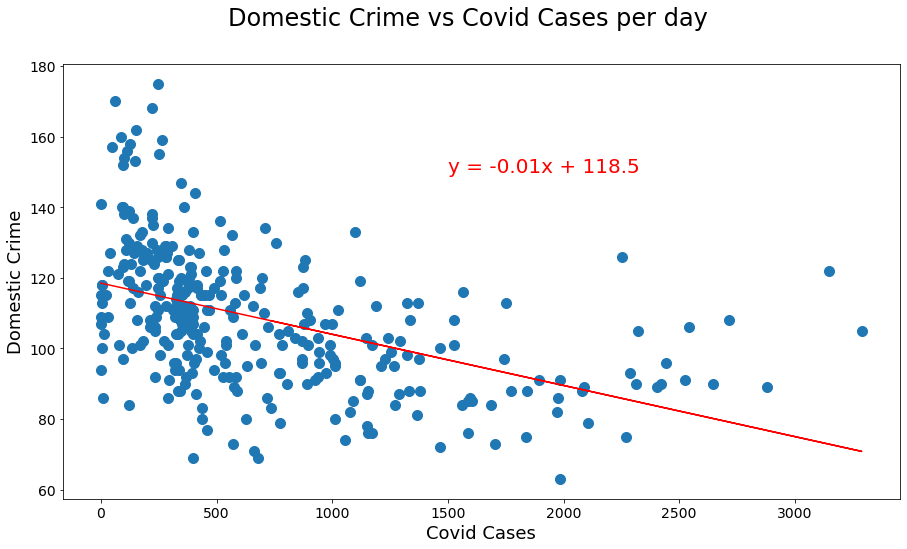

In [41]:
#total_domestic_with_covid_plot = total_domestic_with_covid_df.plot(kind='scatter',x='Cases - Total',y='Counts',color='blue', s =150, fontsize=14)
#total_domestic_with_covid_plot.set_xlabel('Covid Cases', fontsize=18)
#total_domestic_with_covid_plot.set_ylabel('Domestic Crime', fontsize=18)
#plt.suptitle('Domestic Crime vs Covid Cases per day', fontsize=24)
#plt.show()

x_values = total_domestic_with_covid_df['Cases - Total']
y_values = total_domestic_with_covid_df['Counts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s= 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1500,150),fontsize=20,color="red")
plt.xlabel('Covid Cases', fontsize=18)
plt.ylabel('Domestic Crime', fontsize=18)
plt.suptitle('Domestic Crime vs Covid Cases per day', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [88]:
#Plotly with Covid & Crime
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=Covid_transformed.Date, y=Covid_transformed['Cases - Total'], name="Covid data"), secondary_y=False)
fig.add_trace(go.Scatter(x=total_crime_df.Date, y=total_crime_df.Counts, name="Crime data"), secondary_y=True)
fig.update_layout(title_text="Covid & Crime cases with range slider and selectors")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.update_yaxes(title_text="<b>Covid", secondary_y=False)
fig.update_yaxes(title_text="<b>Crime", secondary_y=True)
fig.add_annotation(
    xref="x",
    yref="y2",
    x='2020-05-31',
    y=1894,
    text="May 31st Protest")
fig.add_annotation(
    xref="x",
    yref="y2",
    x='2020-08-10',
    y=934,
    text="August 10th Protest")
fig.show()

In [43]:
Covid_transformed['Week'] = Covid_transformed['Date'].apply(lambda x: x.isocalendar()[1] + (x.isocalendar()[0]-2020)*52)
covid_week = pd.DataFrame(Covid_transformed.groupby('Week').sum())
covid_week.head()

,Cases - Total
Week,
9,0
10,10
11,152
12,968
13,2356


Text(0, 0.5, 'Covid Cases')

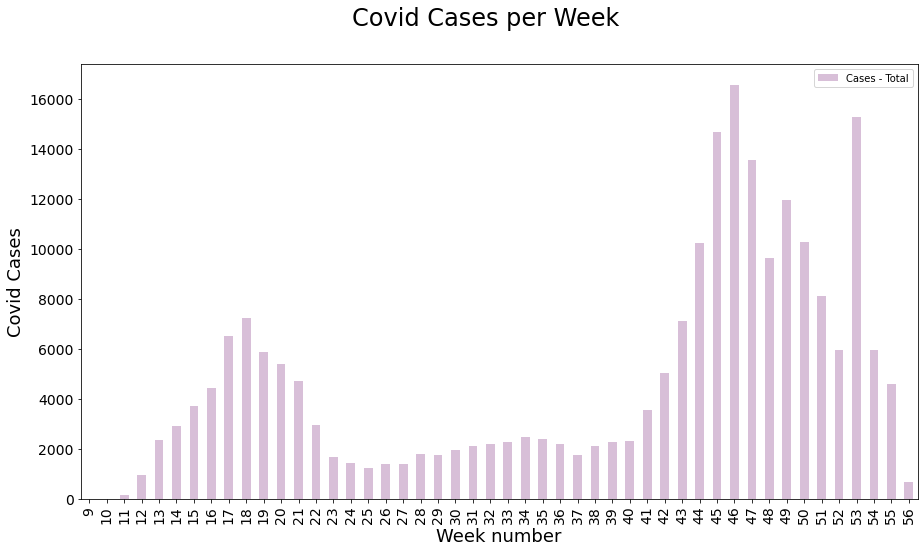

In [44]:
#Weekly covid cases over time
covid_plot = covid_week.plot(kind="bar", color='thistle', fontsize=14)
plt.suptitle('Covid Cases per Week', fontsize=24)
covid_plot.set_xlabel('Week number', fontsize=18)
covid_plot.set_ylabel('Covid Cases', fontsize=18)

In [45]:
total_crime_df['Week'] = total_crime_df['Date'].apply(lambda x: x.isocalendar()[1] + (x.isocalendar()[0]-2020)*52)
crime_week = pd.DataFrame(total_crime_df.groupby('Week').sum())
crime_week.head()

,Counts
Week,
4,3072
5,4743
6,4440
7,4213
8,4422


In [46]:
#Domestic Weekly counts
total_domestic_df['Week'] = total_domestic_df['Date'].apply(lambda x: x.isocalendar()[1] + (x.isocalendar()[0]-2020)*52)
domestic_week = pd.DataFrame(total_domestic_df.groupby('Week').sum())
domestic_week.head()

,Counts
Week,
4,492
5,750
6,713
7,729
8,739


In [71]:
#Plotly with weekly covid and domestic crime data
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=covid_week.index, y=covid_week['Cases - Total'], name="Covid Weekly data"), secondary_y=False)
fig.add_trace(go.Scatter(x=domestic_week.index, y=domestic_week.Counts, name="Domestic Crime Weekly data"), secondary_y=True)
fig.update_layout(title_text="Weekly Covid & Domestic Crime cases")


fig.update_yaxes(title_text="<b>Covid", secondary_y=False)
fig.update_yaxes(title_text="<b>Domestic Crime", secondary_y=True)
fig.update_xaxes(title_text="<b>Week")
fig.add_annotation(x=22, y=6800,
            text="May 31 Protest",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=33, y=7200,
            text="August 10 Protest",
            showarrow=True,
            arrowhead=1)
fig.show()

In [50]:
#Weekly Non-Domestic Data
non_domestic_df = Crime_transformed[~(Crime_transformed['DOMESTIC'] == 'Y')]
non_domestic_df = non_domestic_df.value_counts(["DOMESTIC", 'Date']).reset_index(name='Counts')
non_domestic_df.sort_values('Date', inplace=True)
non_domestic_df['Week'] = non_domestic_df['Date'].apply(lambda x: x.isocalendar()[1] + (x.isocalendar()[0]-2020)*52)
nondomestic_week = pd.DataFrame(non_domestic_df.groupby('Week').sum())
nondomestic_week.head()

,Counts
Week,
4,2580
5,3993
6,3727
7,3484
8,3683


In [72]:
#Plotly with weekly covid and non-domestic crime data
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=covid_week.index, y=covid_week['Cases - Total'], name="Covid Weekly data"), secondary_y=False)
fig.add_trace(go.Scatter(x=nondomestic_week.index, y=nondomestic_week.Counts, name="Non-Domestic Crime Weekly data"), secondary_y=True)
fig.update_layout(title_text="Weekly Covid & Non-Domestic Crime cases")


fig.update_yaxes(title_text="<b>Covid", secondary_y=False)
fig.update_yaxes(title_text="<b>Non-Domestic Crime", secondary_y=True)
fig.update_xaxes(title_text="<b>Week")
fig.add_annotation(x=22, y=14700,
            text="May 31 Protest",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=33, y=10600,
            text="August 10 Protest",
            showarrow=True,
            arrowhead=1)
fig.show()